# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [95]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [37]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [38]:
# Extract all rows of data
mars_rows = soup.find_all('tr', class_='data-row')

# Checking results
mars_rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [44]:
# Create an empty list
mars_table_data = []

# Loop through the scraped data to create a list of rows
for row in mars_rows:
    row_data = row.select('td')

    # Creating a temporary list to append results
    temporary_mars_row = []

    # Looping through results to append temporary_mars_row
    for td in row_data:
        temporary_mars_row.append(td.text)

    # Appending table data to hold results (this line should be inside the inner loop)
    mars_table_data.append(temporary_mars_row)

In [45]:
mars_table_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [46]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_table_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp','pressure'])

In [47]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [50]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [51]:
# Change data types for data analysis
mars_df = mars_df.astype({
    'id':object,
    'terrestrial_date': "datetime64[ns]",
    'sol': int,
    'ls': int,
    'month': int,
    'min_temp': float,
    'pressure': float,

})

In [52]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [53]:
# 1. How many months are there on Mars?
mars_df['month'].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [56]:
# 2. How many Martian days' worth of data are there?
mars_df['sol'].nunique()

1867

In [59]:
# 3. What is the average low temperature by month?
lowest_avg = mars_df.groupby('month')['min_temp'].mean()
lowest_avg

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

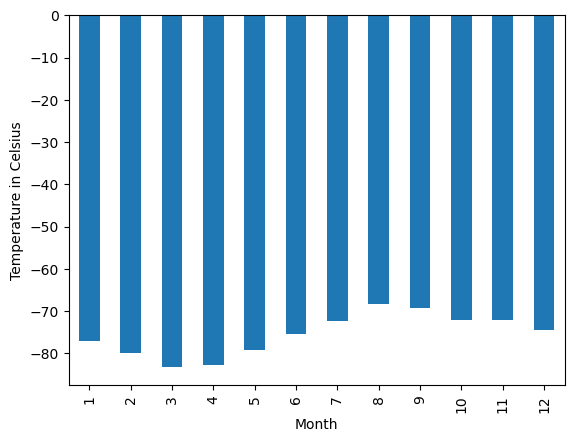

In [60]:
# Plot the average temperature by month
lowest_avg.plot.bar()
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

plt.show()

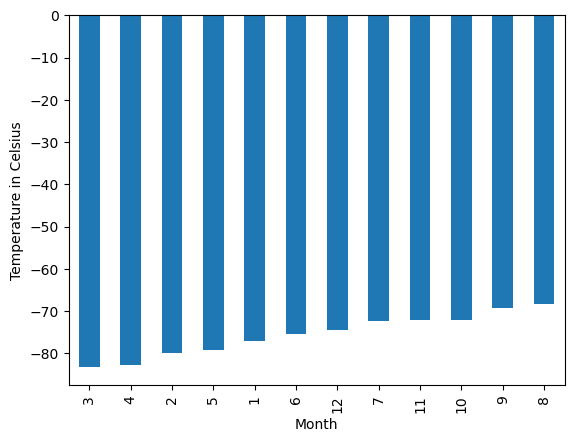

In [61]:
# Identify the coldest and hottest months in Curiosity's location
lowest_avg_sorted = lowest_avg.sort_values()
lowest_avg_sorted

# Plotting the results

lowest_avg_sorted.plot.bar()
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()


In [64]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

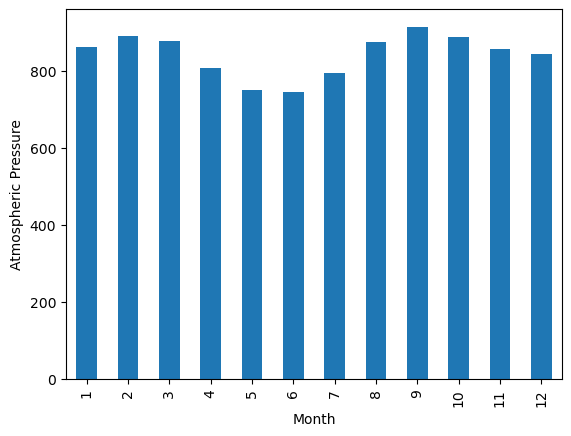

In [66]:
# Plot the average pressure by month
avg_pressure.plot.bar()

plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

plt.show()

In [89]:
# 5. How many terrestrial (earth) days are there in a Martian year?
new_mars_df = mars_df.set_index('terrestrial_date')
new_mars_df

,id,sol,ls,month,min_temp,pressure,day_diff,martian_year,sol_diff
terrestrial_date,,,,,,,,,
2012-08-16,2,10,155,6,-75.0,739.0,NaN,0,NaN
2012-08-17,13,11,156,6,-76.0,740.0,1.0,0,1.0
2012-08-18,24,12,156,6,-76.0,741.0,1.0,0,1.0
2012-08-19,35,13,157,6,-74.0,732.0,1.0,0,1.0
2012-08-20,46,14,157,6,-74.0,740.0,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
2018-02-23,1889,1973,133,5,-78.0,730.0,1.0,2,1.0
2018-02-24,1892,1974,134,5,-77.0,729.0,1.0,2,1.0
2018-02-25,1894,1975,134,5,-76.0,729.0,1.0,2,1.0


In [91]:
# Finding ls that equals 0
ls_0 = new_mars_df.loc[new_mars_df['ls']==0]
ls_0

,id,sol,ls,month,min_temp,pressure,day_diff,martian_year,sol_diff
terrestrial_date,,,,,,,,,
2013-08-01,320,351,0,1,-75.0,853.0,1.0,0,1.0
2013-08-02,319,352,0,1,-77.0,854.0,1.0,0,1.0
2015-06-19,954,1019,0,1,-81.0,849.0,1.0,1,1.0
2015-06-20,938,1020,0,1,-63.0,832.0,1.0,1,1.0
2017-05-06,1606,1688,0,1,-76.0,840.0,1.0,2,1.0
2017-05-07,1610,1689,0,1,-75.0,840.0,1.0,2,1.0


In [92]:
# Finding ls that equals 359 (equivalent to last day in the 12th Martian year)
ls_359 = new_mars_df.loc[new_mars_df['ls']==359]
ls_359

,id,sol,ls,month,min_temp,pressure,day_diff,martian_year,sol_diff
terrestrial_date,,,,,,,,,
2013-07-30,316,349,359,12,-75.0,852.0,1.0,0,1.0
2013-07-31,318,350,359,12,-76.0,853.0,1.0,0,1.0
2015-06-17,955,1017,359,12,-78.0,850.0,1.0,1,1.0
2015-06-18,956,1018,359,12,-79.0,850.0,1.0,1,1.0
2017-05-04,1607,1686,359,12,-75.0,838.0,1.0,2,1.0
2017-05-05,1608,1687,359,12,-75.0,838.0,1.0,2,1.0


In [97]:
# One Martian year is the amount of time it takes ls from 0 to 359.
date_last = '2015-06-17'
date_last_value = datetime.datetime.strptime(date_last, '%Y-%m-%d')
date_last_value

datetime.datetime(2015, 6, 17, 0, 0)

In [101]:
# The same calculation for ls equals to zero
date_first = '2013-08-01'
date_first_value = datetime.datetime.strptime(date_first, '%Y-%m-%d')
date_first_value

datetime.datetime(2013, 8, 1, 0, 0)

In [106]:
# Calculating the earth days in a Martian year (answering question no 5)
mars_year_days = date_last_value - date_first_value

print(f'There is {mars_year_days} terrestrial (Earth) days in a Martian year.')

There is 685 days, 0:00:00 terrestrial (Earth) days in a Martian year.


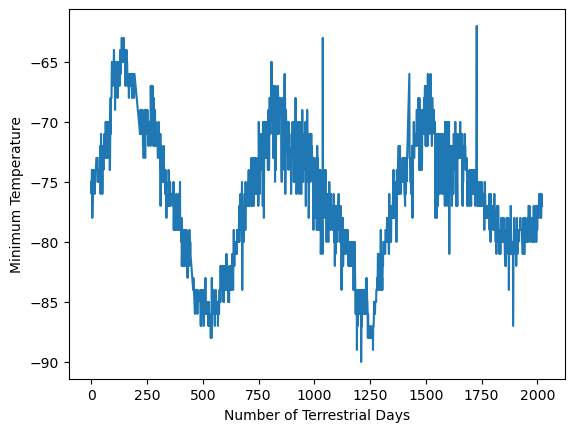

In [72]:
# Visual Estimation 
# Finding the first earth recorded date
first_day = mars_df['terrestrial_date'].agg('min')
#first_day

# Creating a new dataframe to with min_temp from each recorded number of earth days
min_temp_terra_days_df = pd.DataFrame({
    "min_temp": mars_df['min_temp'],
    "terra_days": mars_df['terrestrial_date'] - first_day
    })

#min_temp_terra_days_df

# Plotting the value of earth days vs minimum temperature for each sol record
plt.plot(min_temp_terra_days_df['terra_days'].dt.days, min_temp_terra_days_df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')

plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [107]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', header = True, index = False, date_format='%Y-%m-%d')

In [108]:
browser.quit()